In [1]:
import os
import sys
import pickle
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
WIN = 'D:/'
MAC = '/Volumes/Transcend2/17_20_PhD/19_20_PhD_Metabolomics/'
osp = MAC

In [3]:
MNET_PATH = '/Users/anamaria/git/molnet/code/'
sys.path.append(MNET_PATH)

## Get bad spectral matches between 2 datasets

In [4]:
import mnet
import mnet_utilities

Load the fragmentattion files.

In [5]:
mgf_vl = mnet_utilities.load_mgf(osp+'pymz/mzmine/210120/mzmine_frag/vl/frag_pos_vl.mgf')
mgf_mal = mnet_utilities.load_mgf(osp+'pymz/mzmine/210120/mzmine_frag/mal/frag_pos_mal.mgf')
mgf_zik = mnet_utilities.load_mgf(osp+'pymz/mzmine/210120/mzmine_frag/zik/gnps2.mgf')

Loaded 100 spectra
Loaded 200 spectra
Loaded 300 spectra
Loaded 100 spectra
Loaded 200 spectra
Loaded 300 spectra
Loaded 100 spectra
Loaded 200 spectra
Loaded 300 spectra


Get the cosine similarity scores of the bad spectral matches.

In [69]:
sys.path.append('..')
from metab_utils import get_bad_spectral_matches
badscores_vl_zik = get_bad_spectral_matches(mgf_vl, mgf_zik, 40, 0.2, 2, plot = False)
badscores_vl_mal = get_bad_spectral_matches(mgf_vl, mgf_mal, 40, 0.2, 2, plot = False)
badscores_zik_mal = get_bad_spectral_matches(mgf_zik, mgf_mal, 40, 0.2, 2, plot = False)

Plot the distribution of the scores for the bad spectral matches.

Text(0.5, 1.0, 'VL vs Zika')

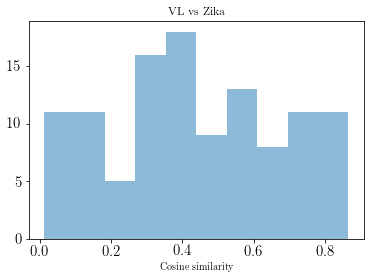

In [49]:
plt.hist(badscores_vl_zik, bins=10, alpha = 0.5)
plt.xlabel('Cosine similarity')
plt.title('VL vs Zika')

Text(0.5, 1.0, 'VL vs Malaria')

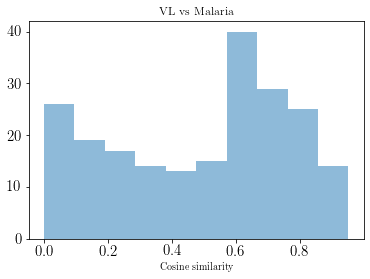

In [50]:
plt.hist(badscores_vl_mal, bins=10, alpha = 0.5)
plt.xlabel('Cosine similarity')
plt.title('VL vs Malaria')

Text(0.5, 1.0, 'Malaria vs Zika')

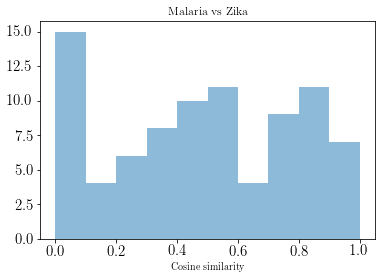

In [51]:
plt.hist(badscores_zik_mal, bins=10, alpha = 0.5)
plt.xlabel('Cosine similarity')
plt.title('Malaria vs Zika')

## Get distribution of bad spectral matches for each good match

Load the JoinAligner object.

In [52]:
sys.path.append('/Users/anamaria/git/pymzm_mine/')
with open(os.path.join(osp,'pymz/mzmine/aligner_gp.txt'), 'rb') as file:
    aligner_gp = pickle.load(file)   

In [53]:
with open('/Volumes/Transcend2/17_20_PhD/19_20_PhD_Metabolomics/pymz/mzmine/peak_picked_files/peakinfolist.dict', 'rb') as file:
    peakinfolist_positive = pickle.load(file)

In [60]:
no_spectra = 0 
one_spectra = 0 
two_spectra = 0 
three_spectra = 0 
m_spec = 0
z_spec = 0
v_spec = 0
for peak in peakinfolist_positive:
    if peak.pval != 0:
        
        if len(peak.spectra) > 0:
            no_spectra+=1
        if len(peak.spectra) == 1:
            one_spectra+=1
            
            
        if len(peak.spectra) == 2:
            two_spectra+=1
            if 'frag_pos_mal' in list(peak.spectra.keys()) :
                m_spec +=1
            if 'gnps2' in list(peak.spectra.keys()):
                z_spec +=1
            if 'frag_pos_vl' in list(peak.spectra.keys()):
                v_spec +=1
            
        if len(peak.spectra) == 3:
            
            three_spectra+=1
            if 'frag_pos_mal' in list(peak.spectra.keys()) :
                m_spec +=1
            if 'gnps2' in list(peak.spectra.keys()):
                z_spec +=1
            if 'frag_pos_vl' in list(peak.spectra.keys()):
                v_spec +=1

In [61]:
m_spec

56

In [62]:
z_spec

59

In [63]:
v_spec

48

In [40]:
three_spectra

11

In [37]:
no_spectra

217

Extract the spectra from the peaksets.

In [54]:
from metab_utils import extract_peaksets_with_spectra_from_dataset
peaksets_gp_spec = extract_peaksets_with_spectra_from_dataset(aligner_gp)

In [55]:
for peak in peaksets_gp_spec:
    print(peak.mean_mz)

72.0808032855653
86.09638435539158
86.09638145880972
104.0705895005611
104.10695318660827
106.04777861701116
106.97155380249023
114.033853819876
114.06619664394495
114.0914071703714
114.09838896799306
118.08318024350886
118.08619744928033
119.08544622387802
120.08078320821126
123.05526661454586
126.0219651607045
129.06583638776814
130.04994198313932
132.06559201290733
132.06553323419246
132.07675539652507
132.10190391540527
132.1019233569764
133.06779024893777
133.09716669718424
146.0811789997837
147.07640299880714
150.05836118731582
151.09650255132604
152.0706551291726
153.06586419490347
156.07683205819345
159.11283897935297
162.11244128501576
163.10956513254266
166.08628909640842
167.1067375304207
168.06674398783764
169.98008009316266
173.1285286953575
176.07063379422038
177.10561665317468
178.0586966526361
178.0723450194755
180.15947111029377
181.0720420543964
183.10168715806034
185.12854820139268
190.08624230179134
192.15956242879233
195.1163762410482
200.02703951116192
203.0525407

Extract the scores for the peaksets which have 2 or more spectra attached.

In [56]:
from metab_utils import extract_scores_pairs_for_dataset
peaksets_vl_mal = extract_scores_pairs_for_dataset(peaksets_gp_spec, 'vl', 'mal')
peaksets_vl_zik = extract_scores_pairs_for_dataset(peaksets_gp_spec, 'vl', 'zik')
peaksets_zik_mal = extract_scores_pairs_for_dataset(peaksets_gp_spec, 'zik', 'mal')

Parse through the list of actual spectral matches and for each match get a distribution of badscores.

In [57]:
#continuous uniform distribution
def calculate_cdf(actual_scores, bs_dict, mz,rt, mz_list, cdf_list, rt_list):
    for i in range(len(actual_scores)):
        x = actual_scores[i]
        inter = bs_dict[list(bs_dict.keys())[i]]

        if(len(inter) >0):
            a = np.min(inter)
            b = np.max(inter)
            if x< a:
                cdf = 0
            elif a <= x <= b:
                cdf = (x-a)/(b-a)
            elif x> b:
                cdf = 1
            cdf_list.append(cdf)
            mz_list.append(mz[i])
            rt_list.append(rt[i])
    return cdf_list, mz_list, rt_list



In [58]:
#discrete uniform distribution
def calculate_dis_cdf(actual_scores, bs_dict, mz,rt, mz_list, cdf_list, rt_list):
    for i in range(len(actual_scores)):
        x = actual_scores[i]
        inter = bs_dict[list(bs_dict.keys())[i]]

        if(len(inter) >0):
            a = np.min(inter)
            b = np.max(inter)
           
            cdf = (x-a+1)/len(inter)
            cdf_list.append(cdf)
            mz_list.append(mz[i])
            rt_list.append(rt[i])
    return cdf_list, mz_list, rt_list


In [59]:
cdfs = []
mzs = []
rts= []
cdfs, mzs, rts = calculate_cdf(act_vl_mal,  bsvm,  mz_vl_mal, rts_vl_mal,mzs, cdfs,rts)
cdfs, mzs, rts = calculate_cdf(act_vl_zik,  bsvz,  mz_vl_zik, rts_vl_zik,mzs, cdfs,rts)
cdfs, mzs, rts = calculate_cdf(act_zik_mal,  bszm,  mz_zik_mal, rts_zik_mal,mzs, cdfs,rts)

In [60]:
cdfs = []
mzs = []
rts= []
cdfs, mzs, rts = calculate_dis_cdf(act_vl_mal,  bsvm,  mz_vl_mal, rts_vl_mal,mzs, cdfs,rts)
cdfs, mzs, rts = calculate_dis_cdf(act_vl_zik,  bsvz,  mz_vl_zik, rts_vl_zik,mzs, cdfs,rts)
cdfs, mzs, rts = calculate_dis_cdf(act_zik_mal,  bszm,  mz_zik_mal, rts_zik_mal,mzs, cdfs,rts)

In [61]:
#Percentage of 0 probability
c = 0
for cdf in cdfs:
    if cdf == 0:
        c +=1
print(c*100/len(cdfs))

0.0


In [62]:
from metab_utils import get_bad_scores_distribution
rtd = 31
bsvm = get_bad_scores_distribution(peaksets_vl_mal, rtd, mgf_vl, mgf_mal)
bsvz = get_bad_scores_distribution(peaksets_vl_zik, rtd, mgf_vl, mgf_zik)
bszm = get_bad_scores_distribution(peaksets_zik_mal,rtd, mgf_zik, mgf_mal)

[0.8937559265414645]
---
[0.7658374221965247, 0.8761475085712053, 0.7045461583693983, 0.7295024578604538]
=====
[0.18591677017273908]
---
[0.2846689796896632, 0.199641520320772, 0.23898131318325155, 0.24834893030228655, 0.3105209442517027, 0.2265562148753412, 0.26447773873174335, 0.27840867532814173]
=====
[0.935130424203516]
---
[]
=====
[0.9250701169352903]
---
[]
=====
[0.9162812845032942]
---
[0.7545084151924624, 0.6749049322319713, 0.7475937137960971, 0.7099908598716972, 0.6911137910779729, 0.7023027824636161, 0.1259479406332194, 0.5252465239650197, 0.15091209112232715, 0.8939395682819702, 0.5885471289299967, 0.8801338051820976]
=====
[0.910713163435703]
---
[0.8771704220523132]
=====
[0.0]
---
[0.020638187396693354]
=====
[0.8362932334502992]
---
[0.8111283019657826]
=====
[0.012890259908999637]
---
[0.03592071037721324]
=====
[0.031447706159945514]
---
[0.0]
=====
[0.0]
---
[0.026680985134665398, 0.08462640315688107, 0.0, 0.06314900593810972, 0.1195970899273854, 0.03326181565407

In [63]:
from metab_utils import print_threshold
print(print_threshold(bszm, peaksets_zik_mal))
print(print_threshold(bsvm, peaksets_vl_mal))
print(print_threshold(bsvz, peaksets_vl_zik))

    #higher bad score       diff #lower bad score       diff #no bad scores
0.1                 0       none                0       none              0
0.2                 0       none                0       none              0
0.3                 0       none                0       none              0
0.4                 0       none                1   0.170555              1
0.5                 0       none                0       none              2
0.6                 2  0.0191444                1  0.0258412              1
0.7                 0       none                0       none              4
0.8                 1   0.040923                0       none              1
0.9                 0       none                2   0.245101              7
1.0                 0       none                8   0.607292             18
    #higher bad score       diff #lower bad score        diff #no bad scores
0.1                 5  0.0320481                1   0.0314477              1
0.2       

/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-pac

Calculate the mean from the distribution of the bad scores.

In [64]:
from metab_utils import calculate_overall
act_vl_mal, bs_vl_mal, rts_vl_mal, mz_vl_mal = calculate_overall(bsvm, peaksets_vl_mal)
act_vl_zik, bs_vl_zik, rts_vl_zik, mz_vl_zik = calculate_overall(bsvz, peaksets_vl_zik)
act_zik_mal, bs_zik_mal, rts_zik_mal, mz_zik_mal = calculate_overall(bszm, peaksets_zik_mal)

/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [65]:
act_scores = act_vl_zik +act_vl_mal+act_zik_mal
bad_scores = bs_vl_zik +bs_vl_mal + bs_zik_mal
rts = rts_vl_zik +  rts_vl_mal +rts_zik_mal
mz = mz_vl_zik + mz_vl_mal + mz_zik_mal

In [66]:
import seaborn as sns

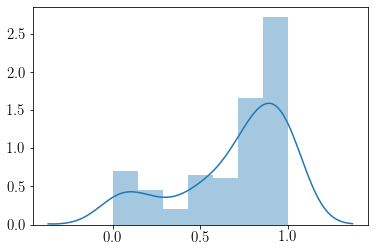

In [67]:
sns.distplot(act_scores)

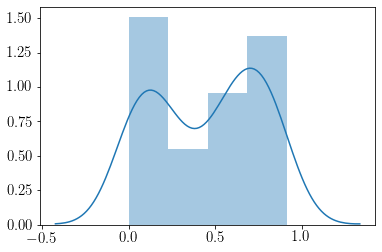

In [68]:
sns.distplot(bad_scores)

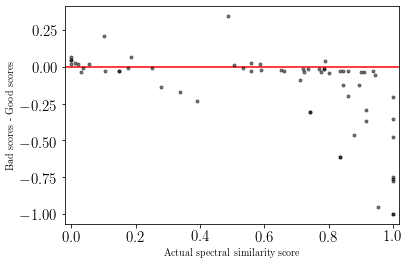

In [47]:
fig, ax = plt.subplots()
nice_fonts = {"text.usetex": True,
    "font.family": "serif",
    "font.serif" : "Times New Roman"}
plt.rcParams.update(nice_fonts)

plt.rc('font', family='serif')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

ax.plot(act_scores, np.array(bad_scores)[:None] -np.array(act_scores)[:None] ,  '.', color = '#000000', alpha = 0.5)
ax.hlines(0,-0.02,1.02, color='r')


plt.xlabel('Actual spectral similarity score')
plt.ylabel('Bad scores - Good scores')
plt.xlim(-0.02,1.02)
fig.savefig(osp+'positive_mode/ms2scores.tiff', format = 'tiff', dpi =600, bbox_inches='tight')

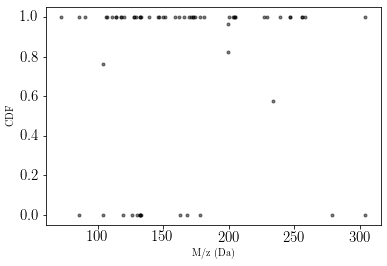

In [95]:
fig, ax = plt.subplots()
plt.plot(mzs,cdfs,'.', color = '#000000', alpha = 0.5)
plt.ylabel('CDF')
plt.xlabel('M/z (Da)')
fig.savefig(osp+'positive_mode/ms2scores_cdf_mz.tiff', format = 'tiff', dpi =600, bbox_inches='tight')

In [85]:
diff = np.array(bad_scores)[:None] -np.array(act_scores)[:None]

In [70]:
c = 0
for d in diff:
    if d < 0:
        c +=1
print(c*100/len(diff))

35.97122302158273
